In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4MB 67.2MB/s 
     |████████████████████████████████| 460kB 50.3MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [ ]:
class Emotion:
  def __init__(self, data, test_data, data_label, test_label):
    self.tokenizer = Tokenizer()
    self.okt = Okt()
    self. stopwords = ['백주부','ㅋ','ㅎ','ㅠ','ㅜㅜ','^^','의','(','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', 'ㄴ','ㅠ',',','0',';','ㅜ','/','~','!','?','♥♥','♡♡','♡','♥']

    self.train_D = self.tokenize(data)
    self.test_D = self.tokenize(test_data)
    self.train_L = np.array(data_label)
    self.test_L = np.array(test_label)
    self.tokenizer.fit_on_texts(self.train_D)


    #drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

  def tokenize(self, data):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

    arr  =[]
    for sen in data:
      sen = re.sub(emoji_pattern, "", sen)
      sen = re.sub(han, "", sen)
      temp = self.okt.morphs(sen, stem = True)#True
      temp = [word for word in temp if not word in self.stopwords]
      arr.append(temp)
    return arr



In [ ]:
import pandas as pd 
dataset = pd.read_excel('한국어_단발성_대화_데이터셋.xlsx', usecols = ['Sentence','Emotion'],)

In [ ]:
data_csv = pd.DataFrame(dataset)

In [ ]:
#공포 놀람 분노 슬픔 중립 행복 혐오 

In [ ]:
#분노 슬픔 중립 행복

In [ ]:
from sklearn.preprocessing import LabelEncoder
one = LabelEncoder()
data_csv['Emotion'] = one.fit_transform(np.array(data_csv['Emotion']).reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data_csv[data_csv['Emotion']== 1]

,Sentence,Emotion
5468,7로 나온다든데 아니었나,1
5469,의사양반 내가고자라니!,1
5470,이 사람 얼굴이 약간 전라도 사람처럼 생겼네,1
5471,아직도 안잡았냐??,1
5472,이분 ~~진짜 욕먹는건 이제 신의 영역에 들어선거같다~~ㅋㅋ,1
...,...,...
11361,시대가 어느시대인데 사람이 뽑냐,1
11362,진심 내 인생 드라마임..,1
11363,대단하다... 진짜,1
11364,헐 김종민이가 대상급인가?,1


In [ ]:
for i in range(len(data_csv)):
  if data_csv['Emotion'][i] == 0 or data_csv['Emotion'][i] == 1 or data_csv['Emotion'][i] == 6: #or data_csv['Emotion'][i] == 2:
    data_csv = data_csv.drop(i)

In [ ]:
data_csv.to_csv('dataset.csv', index = False)

In [ ]:
data  = pd.read_csv('dataset.csv')

In [ ]:
#data.loc[data['Emotion'] ==3, 'Emotion']=2 #슬픔 화남 합치자

In [ ]:
data

,Sentence,Emotion
0,서해 수자원도 한류라서 그동안 불법조업 방치했나?,2
1,니가 인간이가.,2
2,강아지를 때리고 유기하는것만 학대는 아닙니다!,2
3,하여간 우리나라 교육엔 미래가 없어!!,2
4,채널에이 군부 개인거 인증하냐 동아일보야!!,2
...,...,...
21859,그냥 그래,4
21860,그저 그런 정도?,4
21861,좋아,5
21862,오 그거 좋은데?,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
one2 = LabelEncoder()
data['Emotion'] = one2.fit_transform(np.array(data['Emotion']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data

,Sentence,Emotion
0,서해 수자원도 한류라서 그동안 불법조업 방치했나?,0
1,니가 인간이가.,0
2,강아지를 때리고 유기하는것만 학대는 아닙니다!,0
3,하여간 우리나라 교육엔 미래가 없어!!,0
4,채널에이 군부 개인거 인증하냐 동아일보야!!,0
...,...,...
21859,그냥 그래,2
21860,그저 그런 정도?,2
21861,좋아,3
21862,오 그거 좋은데?,3


In [ ]:
rdata = data[:-65].sample(frac=1).reset_index(drop=True)

In [ ]:
rdata

,Sentence,Emotion
0,sns마케팅하면 스베누지 질은 쓰레기,0
1,그냥 편의점이라 생각했는뎅 로또가 있더라구요... ㅠㅠ,1
2,개인정보 사용자 동의 없는 유출로 법적 처벌 받아야 한다,2
3,즉각 퇴진ㆍ구속 수사!!,0
4,헐~ 이게 2016년???????,2
...,...,...
21794,은숙작가는 한번쓴배우 또 쓰는편인듯,2
21795,솔저 오브 포츈이 생각난다.,2
21796,몰카가 진짜면 큰일인데요.....,0
21797,"전 이공연 조명,음향등 억대로 들어가는데 누가 이돈을 내고 있는지 참 궁금합니다.",2


In [ ]:
#rdata = pd.concat([rdata[:10000],data[-65:]], axis = 0, ignore_index=True)

In [ ]:
rdata.to_csv('train.csv', index = False, header = True)

In [ ]:
#rdata = data[-65:].sample(frac = 1).reset_index(drop=True)

In [ ]:
rdata = rdata.sample(frac = 1).reset_index(drop = True)

In [ ]:
#!pip install git+https://github.com/ssut/py-hanspell.git


In [ ]:
# from hanspell import spell_checker

# for i in range(len(data)):
#   spelled_sent = spell_checker.check(data['Sentence'][i])

#   data['Sentence'][i] = spelled_sent.checked

In [ ]:
rdata =pd.read_csv('train.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train_D, test_D , train_L, test_L = train_test_split(rdata['Sentence'], rdata['Emotion'], train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
dataset2 = pd.read_excel('train_ver.xlsx', usecols = ['Sentence','Label'])

In [ ]:
dataset3 = pd.read_excel('train_ver_2.xlsx', usecols = ['Sentence', 'Label'])

In [ ]:
#dataset2.loc[dataset2['Label'] ==1, 'Label']= 0 #슬픔 화남 합치자

In [ ]:
#dataset3.loc[dataset3['Label']==1, 'Label'] = 0

In [ ]:
dataset2.rename(columns = {'Label' : 'Emotion'}, inplace = True)

dataset3.rename(columns =  {'Label': 'Emotion'}, inplace = True )

In [ ]:
#one2 = LabelEncoder()
#dataset2['Emotion'] = one2.fit_transform(np.array(dataset2['Emotion']).reshape(-1,1))

In [ ]:
#dataset3['Emotion'] = one2.fit_transform(np.array(dataset3['Emotion']).reshape(-1,1))

In [ ]:
data2 = pd.concat([data[-65:], pd.DataFrame(dataset2)], ignore_index = True)#.sample(frac = 1).reset_index(drop=True)

In [ ]:
data2 = pd.concat([data2, dataset3], ignore_index= True)

In [ ]:
data2

,Sentence,Emotion
0,그 사람이 죽어버렸으면 좋겠어요,0
1,오늘 진짜 짜증나,0
2,맛집이라 해서 갔는데 맛이 쓰레기야,0
3,과제가 너무 많아,0
4,오늘도 야근이야,0
...,...,...
582,나아지고 있는 거 같아,3
583,주말이야,3
584,너무 고마워,3
585,결혼할 거 같아,3


In [ ]:
#data2[data2['Emotion']==3] #77 389 , , 90

In [ ]:
#data2.to_csv('train2.csv', header = True, index = False)
data2 = pd.read_csv("train2.csv")

In [ ]:
#data_real = pd.concat([rdata, data2], axis = 0)

In [ ]:
#data_real

,Sentence,Emotion
0,마약검사도 추가해주시면 땡큐~,2
1,설현 기획사에서 넘 밀어주는듯..,2
2,김연아 선수를 알게 된 건 행운입니다.,3
3,나나 첨부터 외모가 냉철해보이긴하는데 예능에서 애교떠는거 놀랬음,3
4,박주영이 대표팀복귀 해야 한다,2
...,...,...
582,나아지고 있는 거 같아,3
583,주말이야,3
584,너무 고마워,3
585,결혼할 거 같아,3


### 위는 데이터 분류. 여기서부터 실행 ㄱ

In [ ]:
data2 = pd.read_csv('train.csv')
#data2 = pd.read_csv('insta_dataset.csv')

In [ ]:
data2

,Sentence,Emotion
0,마약검사도 추가해주시면 땡큐~,2
1,설현 기획사에서 넘 밀어주는듯..,2
2,김연아 선수를 알게 된 건 행운입니다.,3
3,나나 첨부터 외모가 냉철해보이긴하는데 예능에서 애교떠는거 놀랬음,3
4,박주영이 대표팀복귀 해야 한다,2
...,...,...
21794,저거...얼마나갈까.대우조선...삼성..현대....대한민국 조선소가 힘들다....뭐...,0
21795,인간이 영화따라하나 영화가 미래를 내다보나?,2
21796,항상 기다릴테니까!,3
21797,일본은 항상 먼가 먼저 이루지만 한국과 중국에 항상 뺏겨서..ㅋ초기에 즐겨라~ㅋ나중...,3


In [ ]:
from sklearn.model_selection import train_test_split

train_D, test_D , train_L, test_L = train_test_split(data2['Sentence'], data2['Emotion'], train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
save_test_data = {}
save_test_data['Sentence'] = test_D
save_test_data['Emotion'] = test_L
pd.DataFrame(save_test_data).to_csv('AIHub_test_dataset.csv', index = False)

In [ ]:
#train_D2, test_D2 , train_L2, test_L2 = train_test_split(data2['Sentence'], data2['Emotion'], train_size = 0.99, random_state = 42, shuffle = True)

In [ ]:
# train_D.append(train_D2)
# test_D.append(test_D2)
# train_L.append(train_L2)
# test_L.append(test_L2)

In [ ]:
emotion = Emotion(train_D, test_D, train_L, test_L)

In [ ]:
#emotion2 = Emotion(train_D2, test_D2, train_L2, test_L2)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# def tfidf_featurizer(corpus_train,corpus_test):
#     count_vectorizer = CountVectorizer()
#     count_vectorizer.fit_transform(corpus_train)
#     freq_term_matrix = count_vectorizer.transform(corpus_train)
#     tfidf = TfidfTransformer(norm="l2")
#     tfidf.fit(freq_term_matrix)
#     # unigram features
#     tfidf_token = TfidfVectorizer(ngram_range=(1,1),max_features=3000)
#     token_tfidf_total = tfidf_token.fit_transform(corpus_train+corpus_test)
#     token_tfidf_total_mat = token_tfidf_total.toarray()
#     # bigram features
#     tfidf_bi_token = TfidfVectorizer(ngram_range=(1,2),max_features=3000)
#     token_tfidf_bi_total = tfidf_bi_token.fit_transform(corpus_train+corpus_test)
#     token_tfidf_bi_total_mat = token_tfidf_bi_total.toarray()
#     return token_tfidf_total_mat,token_tfidf_bi_total_mat

In [ ]:
word_index = emotion.tokenizer.word_index

In [ ]:
#emotion.train_D
emotion.train_D

In [ ]:
len(emotion.tokenizer.word_index)

15797

In [ ]:
threshold = 1
total_cnt = len(emotion.tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in emotion.tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 15797
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [ ]:
# vocab_size = total_cnt - rare_cnt + 2 #+ len(emotion.tokenizer.word_index)
# print('단어 집합의 크기 :',vocab_size)
vocab_size = total_cnt + 1

In [ ]:
import json
json = json.dumps(emotion.tokenizer.word_index)
f3 = open("base_wordIndex.json", "w")
f3.write(json)
f3.close()

In [ ]:
f3

In [ ]:

X_train = tokenizer.texts_to_sequences(emotion.train_D)
X_test = tokenizer.texts_to_sequences(emotion.test_D)

In [ ]:
import json
to = Tokenizer(vocab_size)
with open('./base_wordIndex.json') as json_file:
  word_index = json.load(json_file)
  to.word_index = word_index
to.texts_to_sequences(emotion.test_D[:10])

[[1310, 2875, 369, 1],
 [1304, 7261, 8, 100, 17, 1022, 7, 27, 99, 56, 295],
 [571, 31, 745, 869, 16, 380, 296],
 [742, 6758, 1160, 1475, 206, 22],
 [214, 2525, 130, 231, 440, 7327, 14, 14475, 1, 5, 397, 101, 379, 1, 2944],
 [4698, 6155, 61, 63, 956, 41, 696, 3607, 6492, 87, 230, 236, 8276, 1, 84, 9],
 [752,
  7,
  88,
  4773,
  759,
  5660,
  94,
  1585,
  16,
  29,
  17,
  494,
  36,
  359,
  26,
  350,
  55,
  80,
  2157,
  1548,
  267,
  1381,
  220],
 [516, 6, 11559, 222, 834, 3],
 [1211, 3285, 218, 590],
 [635, 1737, 117, 1247, 275, 132, 1127, 164, 253, 698, 105, 170]]

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# tokenizer2 = Tokenizer(vocab_size, oov_token ='OOV')
# tokenizer2.fit_on_texts(emotion2.train_D)
# X_train_2 = tokenizer2.texts_to_sequences(emotion2.train_D)
# X_test_2 = tokenizer2.texts_to_sequences(emotion2.test_D)

In [ ]:
drop_train

[3157, 8623, 13165, 13554]

In [ ]:
print(np.asarray(X_train).shape)

(17439,)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
#X_train.extend(X_train_2)

In [ ]:
print(np.asarray(X_train).shape)

(17439,)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
#X_test.extend(X_test_2)

In [ ]:
#train_L = np.append(emotion.train_L, emotion2.train_L ,axis = 0)

In [ ]:
#test_L = np.append(emotion.test_L, emotion2.test_L, axis= 0)

In [ ]:
X_test[:10]

[[1310, 2875, 369, 1],
 [1304, 7261, 8, 100, 17, 1022, 7, 27, 99, 56, 295],
 [571, 31, 745, 869, 16, 380, 296],
 [742, 6758, 1160, 1475, 206, 22],
 [214, 2525, 130, 231, 440, 7327, 14, 14475, 1, 5, 397, 101, 379, 1, 2944],
 [4698, 6155, 61, 63, 956, 41, 696, 3607, 6492, 87, 230, 236, 8276, 1, 84, 9],
 [752,
  7,
  88,
  4773,
  759,
  5660,
  94,
  1585,
  16,
  29,
  17,
  494,
  36,
  359,
  26,
  350,
  55,
  80,
  2157,
  1548,
  267,
  1381,
  220],
 [516, 6, 11559, 222, 834, 3],
 [1211, 3285, 218, 590],
 [635, 1737, 117, 1247, 275, 132, 1127, 164, 253, 698, 105, 170]]

In [ ]:
print(train_D)

14323                 이미내려갈팀을 구해낸분인데
17385               아 내가 평균 이상이다!!!!
17959                  공짜돈 쓰는게 임자입니다
5244              맛있는것 많이 해줘서 감사해요~~
10925                일날 뭘 보고 살아야 하나요
                    ...             
11964      꼭 다른나라가서 못해서 퇴출되서오면 잘하더라~
21575      순ㅅ ㅣ라 너 땜에 올림픽도 개최몬한다어쩔래?
5390     돈없는데 게임하고 싶으면 어떻게 해야 할까요..?
860            그리고 출산선물은 어떻게 좋을까요 ㅜㅜ
15795                   소녀시대가 원탑인 듯.
Name: Sentence, Length: 17439, dtype: object


In [ ]:
train_D = np.delete(X_train, drop_train, axis=0)
train_L = np.delete(emotion.train_L, drop_train, axis=0)
print(len(train_D))
print(len(train_L))

17435
17435


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


 최대 길이 : 75
 평균 길이 : 7.1949526813880125


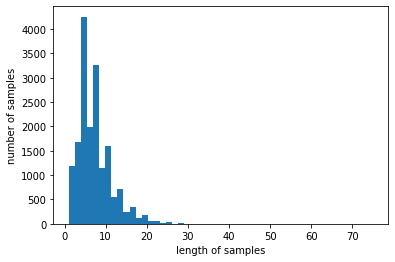

In [ ]:
print(' 최대 길이 :',max(len(l) for l in train_D))
print(' 평균 길이 :',sum(map(len, train_D))/len(train_D))
plt.hist([len(s) for s in train_D], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 8
below_threshold_len(max_len, train_D)

전체 샘플 중 길이가 8 이하인 샘플의 비율: 70.84026383710926


In [ ]:
train_D = pad_sequences(train_D, maxlen = max_len)
test_D = pad_sequences(X_test, maxlen = max_len)

In [ ]:
train_L

array([3, 3, 2, ..., 1, 1, 2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
train_L = one.fit_transform(np.array(train_L).reshape(-1,1)).toarray()
test_L = one.transform(np.array(emotion.test_L).reshape(-1,1)).toarray()


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU, Conv1D,Flatten,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.layers import Bidirectional

In [ ]:
train_D.shape

(17435, 8)

In [ ]:
test_D.shape

(4360, 8)

In [ ]:
# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(Conv1D(100, 3,activation = 'relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Flatten())
# model.add(Dense(train_L.shape[1], activation='softmax'))

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50))#, trainable = True))
model.add((GRU(128, activation = 'tanh')))
model.add(Dropout(0.5))
# model.add(Dense(32))
# model.add(Dropout(0.5))
model.add(Dense(train_L.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          789950    
_________________________________________________________________
gru (GRU)                    (None, 128)               68736     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 516       
Total params: 859,202
Trainable params: 859,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#test_L
from keras import optimizers
adam = optimizers.Adam(lr = 1e-3, clipvalue = 0.6)#lr = 1e-3, decay = 1e-5, clipvalue = 0.6)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('base_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
import datetime
log_dir= 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d - %H%M%S")
tensorboard_callback = TensorBoard(log_dir= log_dir, histogram_freq = 1)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_D, train_L, epochs=15, callbacks=[es, mc], batch_size=30, validation_split = 0.2)# 30, 2

Train on 13948 samples, validate on 3487 samples
Epoch 1/15
13890/13948 [============================>.] - ETA: 0s - loss: 1.0767 - acc: 0.5204
Epoch 00001: val_acc improved from -inf to 0.62661, saving model to base_model.h5
13948/13948 [==============================] - 15s 1ms/sample - loss: 1.0757 - acc: 0.5210 - val_loss: 0.8955 - val_acc: 0.6266
Epoch 2/15
13890/13948 [============================>.] - ETA: 0s - loss: 0.6780 - acc: 0.7443
Epoch 00002: val_acc did not improve from 0.62661
13948/13948 [==============================] - 12s 894us/sample - loss: 0.6780 - acc: 0.7444 - val_loss: 0.9477 - val_acc: 0.6235
Epoch 3/15
13920/13948 [============================>.] - ETA: 0s - loss: 0.4394 - acc: 0.8412
Epoch 00003: val_acc did not improve from 0.62661
13948/13948 [==============================] - 13s 898us/sample - loss: 0.4396 - acc: 0.8411 - val_loss: 1.1237 - val_acc: 0.6100
Epoch 4/15
13890/13948 [============================>.] - ETA: 0s - loss: 0.2877 - acc: 0.9027
E

In [ ]:
# import json
# with open('lux_gru_without_validation.json', 'w') as f:
#   json.dump(history.history, f)

In [ ]:
# with open('lux_gru.json', 'r') as f:
#   j = json.load(f)
# print(j)

{'loss': [1.1083629131317139, 0.7087929844856262, 0.4813916087150574, 0.3357672393321991, 0.25985777378082275], 'acc': [0.5101089477539062, 0.7310725450515747, 0.8341697454452515, 0.8888012766838074, 0.9181961417198181], 'val_loss': [0.8991413712501526, 0.9174095988273621, 1.0305854082107544, 1.2319316864013672, 1.3788293600082397], 'val_acc': [0.6194436550140381, 0.6372239589691162, 0.6185833215713501, 0.5999426245689392, 0.5965012907981873]}


In [ ]:
#model.save('base_model.h5')

In [ ]:
#%reload_ext tensorboard

In [ ]:
#rm -rf ./logs/

In [ ]:
#!kill 719

In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
#model.compile()

In [ ]:
test_D.shape

(4360, 8)

In [ ]:
test_L.shape

(4360, 4)

In [ ]:
loaded_model = load_model('base_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_D,test_L )[1]))

4360/4360 [==============================] - 1s 143us/sample - loss: 0.8956 - acc: 0.6142

 테스트 정확도: 0.6142


In [ ]:
len(test_D)

4360

In [ ]:
test_D

array([[   0,    0,    0, ..., 2876,  370,    2],
       [1023,    1,    8, ...,   57,    1,  296],
       [   0,  572,   32, ...,   17,  381,  297],
       ...,
       [   0,    0,    0, ..., 7132,  402,   14],
       [   0,    0,    0, ...,  213, 2356,    6],
       [   0,    0,    0, ..., 8074, 4878, 3401]], dtype=int32)

accuracy: 0.6142201834862385


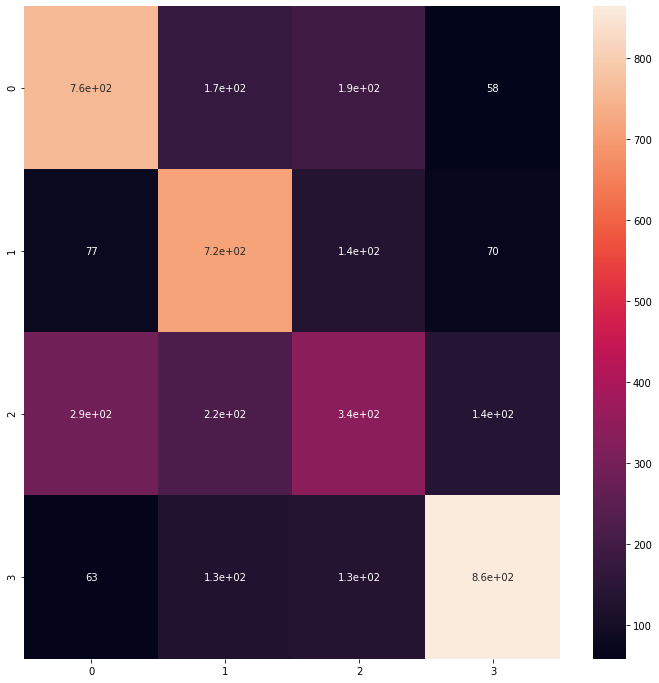

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
pred = loaded_model.predict(test_D)
prediction = []
for p in pred:
  prediction.append(np.argmax(p))
label = []
for l in test_L:
  label.append(np.argmax(l)) 
print('accuracy:', accuracy_score(label, prediction))
#test_L
#prediction
confusion = confusion_matrix(label, prediction)
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,12))
sns.heatmap(confusion, annot = True)

In [ ]:
#loaded_model.get_config()
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
accuracy_result = accuracy_score(label, prediction)
result = precision_recall_fscore_support(label, prediction)
confusion = confusion_matrix(label, prediction)
print(result)

(array([0.6162707 , 0.69146608, 0.46315789, 0.7804878 ]), array([0.72358411, 0.63326653, 0.44534413, 0.72544081]), array([0.66562986, 0.66108787, 0.45407637, 0.75195822]), array([1183,  998,  988, 1191]))


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = emotion.okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in emotion.stopwords] # 불용어 제거
  print(new_sentence)
  encoded = emotion.tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  #print(pad_new)

  pred= loaded_model.predict(pad_new) # 예측
  return pred

In [ ]:
(sentiment_predict('내가 얼마나 힘들었는지 알아?'))

['내', '얼마나', '힘들다', '알', '아']


array([[1.3088878e-03, 9.9256426e-01, 9.9120149e-04, 5.1357239e-03]],
      dtype=float32)

In [ ]:
#부정 중립 행복

In [ ]:
#화남 슬픔 중립  행복

#make_data

In [ ]:
import lightgbm

In [ ]:
train_L.shape

(469, 4)

In [ ]:
lgbm = lightgbm.LGBMClassifier()

In [ ]:
lgbm.fit(train_D, np.argmax(train_L, axis= 1))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred = lgbm.predict(test_D)#, np.argmax(test_L, axis =1))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(pred, np.argmax(test_L, axis =1 ))

array([[ 1,  0,  0,  2],
       [11, 74,  4, 17],
       [ 0,  0,  1,  0],
       [ 0,  4,  0,  4]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, np.argmax(test_L, axis =1))

0.6779661016949152

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer